Importing required Libraries

# Narender Mahor 
# Solutions - PS7

## Task 1

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

In [2]:
# Loading the data
df = pd.read_csv(r"C:\Users\Narender Narender\OneDrive - University of South Carolina\Desktop\Econ\Classes\Econ833\CompEcon_Fall25\MachineLearning\biden.csv")
df.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


Fitting the Tree

In [10]:
RANDOM_STATE = 25

y = df['biden']
X = df.drop(['biden'], axis=1) 

# 70/30 split with fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

# Decision tree with recursive binary splitting
tree = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=5,
    random_state=RANDOM_STATE
)
tree.fit(X_train, y_train)


# Predictions & test MSE
y_pred = tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (max_depth=3, min_samples_leaf=5): {test_mse:.4f}")

Test MSE (max_depth=3, min_samples_leaf=5): 396.1937


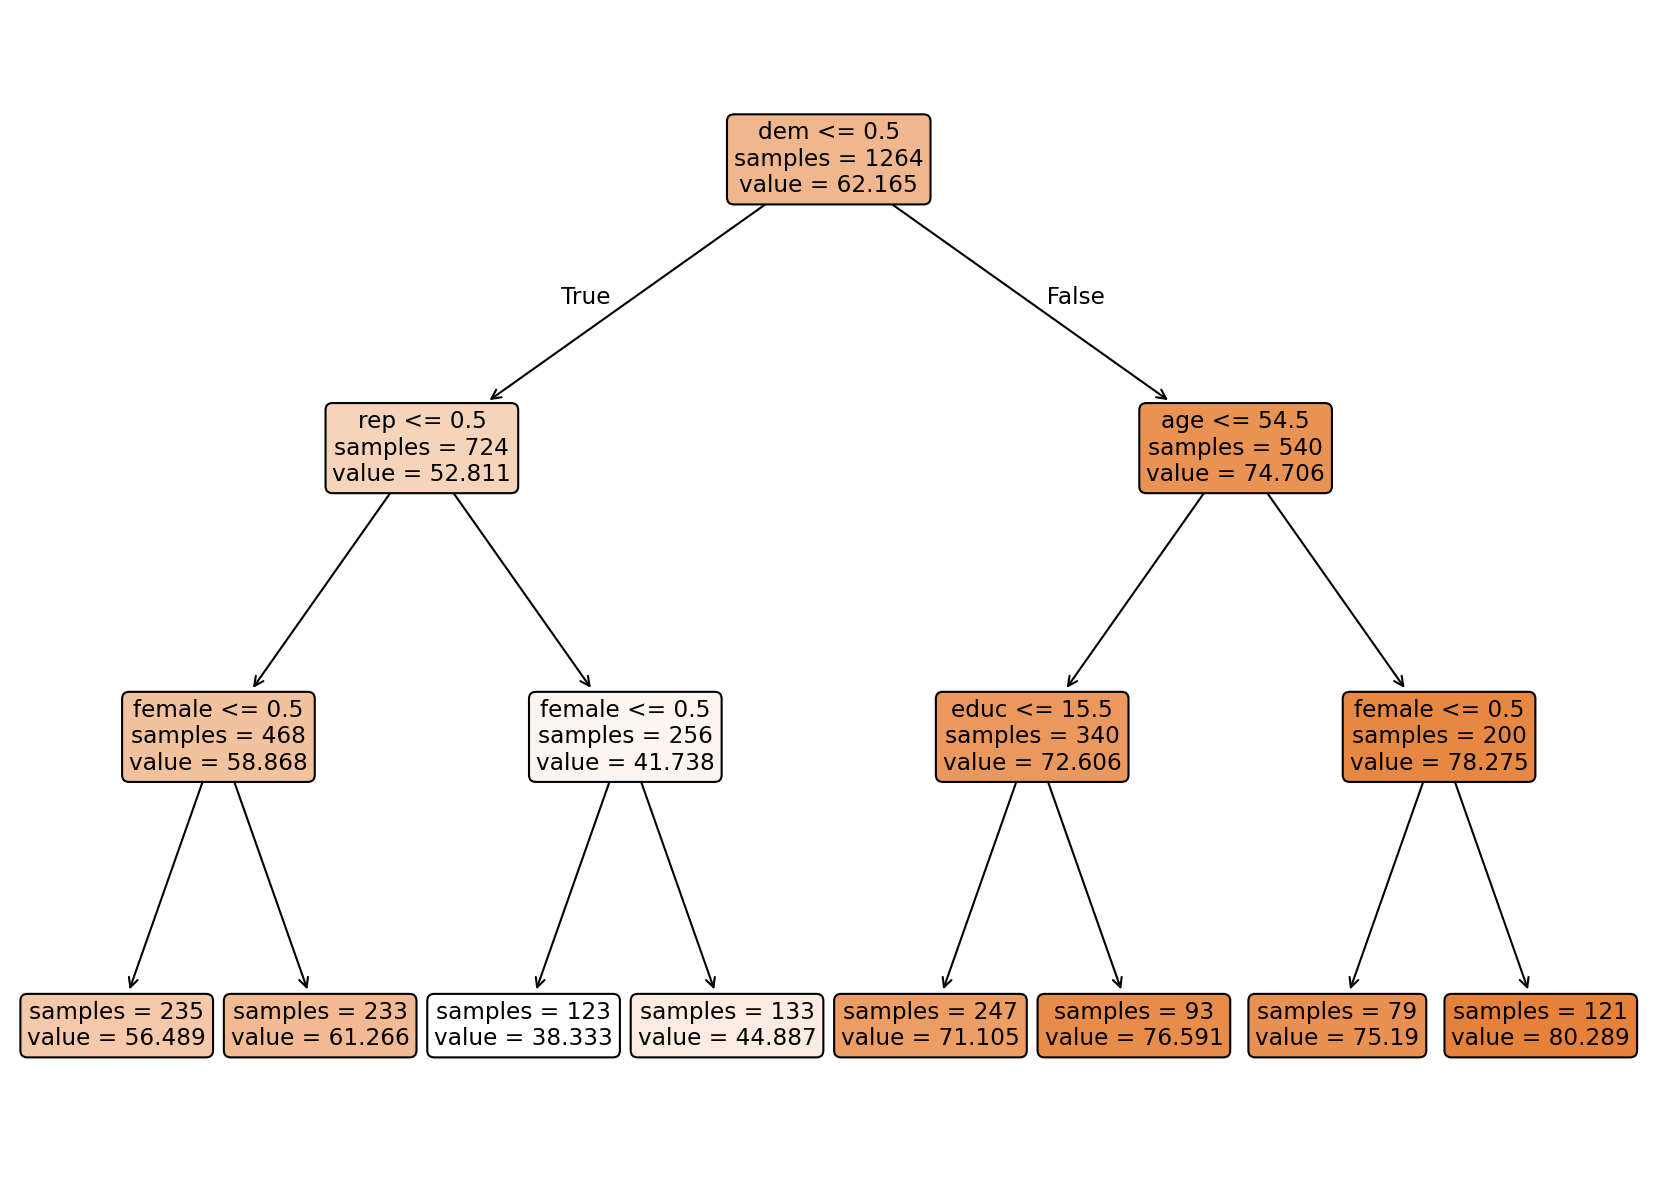

In [13]:
# Plotting the tree
feature_names = list(X.columns)

plt.figure(figsize=(14, 10), dpi=150)
plot_tree(
    tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    impurity=False
)
plt.show()



Plotting the Tree

Interpretation of the results:

1. Older democrat Women are warmest towards Biden.
2. Younger democrats with college education are more likely to like Biden
3. Male repulicans like Biden the least.

## Task 2

In [14]:
# Parameter distributions
param_dist = {
    "max_depth": [3, 10],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20),
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rs = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
    param_distributions=param_dist,
    n_iter=100,
    n_jobs=-1,
    cv=cv5,
    random_state=RANDOM_STATE,
    scoring="neg_mean_squared_error",
    verbose=0,
)

rs.fit(X, y)

best_params = rs.best_params_
best_cv_mse = -rs.best_score_  # converted from negative MSE to MSE

print("Task 2 — Best params:", best_params)
print(f"Task 2 — Best CV MSE: {best_cv_mse:.4f}")



Task 2 — Best params: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 19}
Task 2 — Best CV MSE: 401.9101


Plot the tree

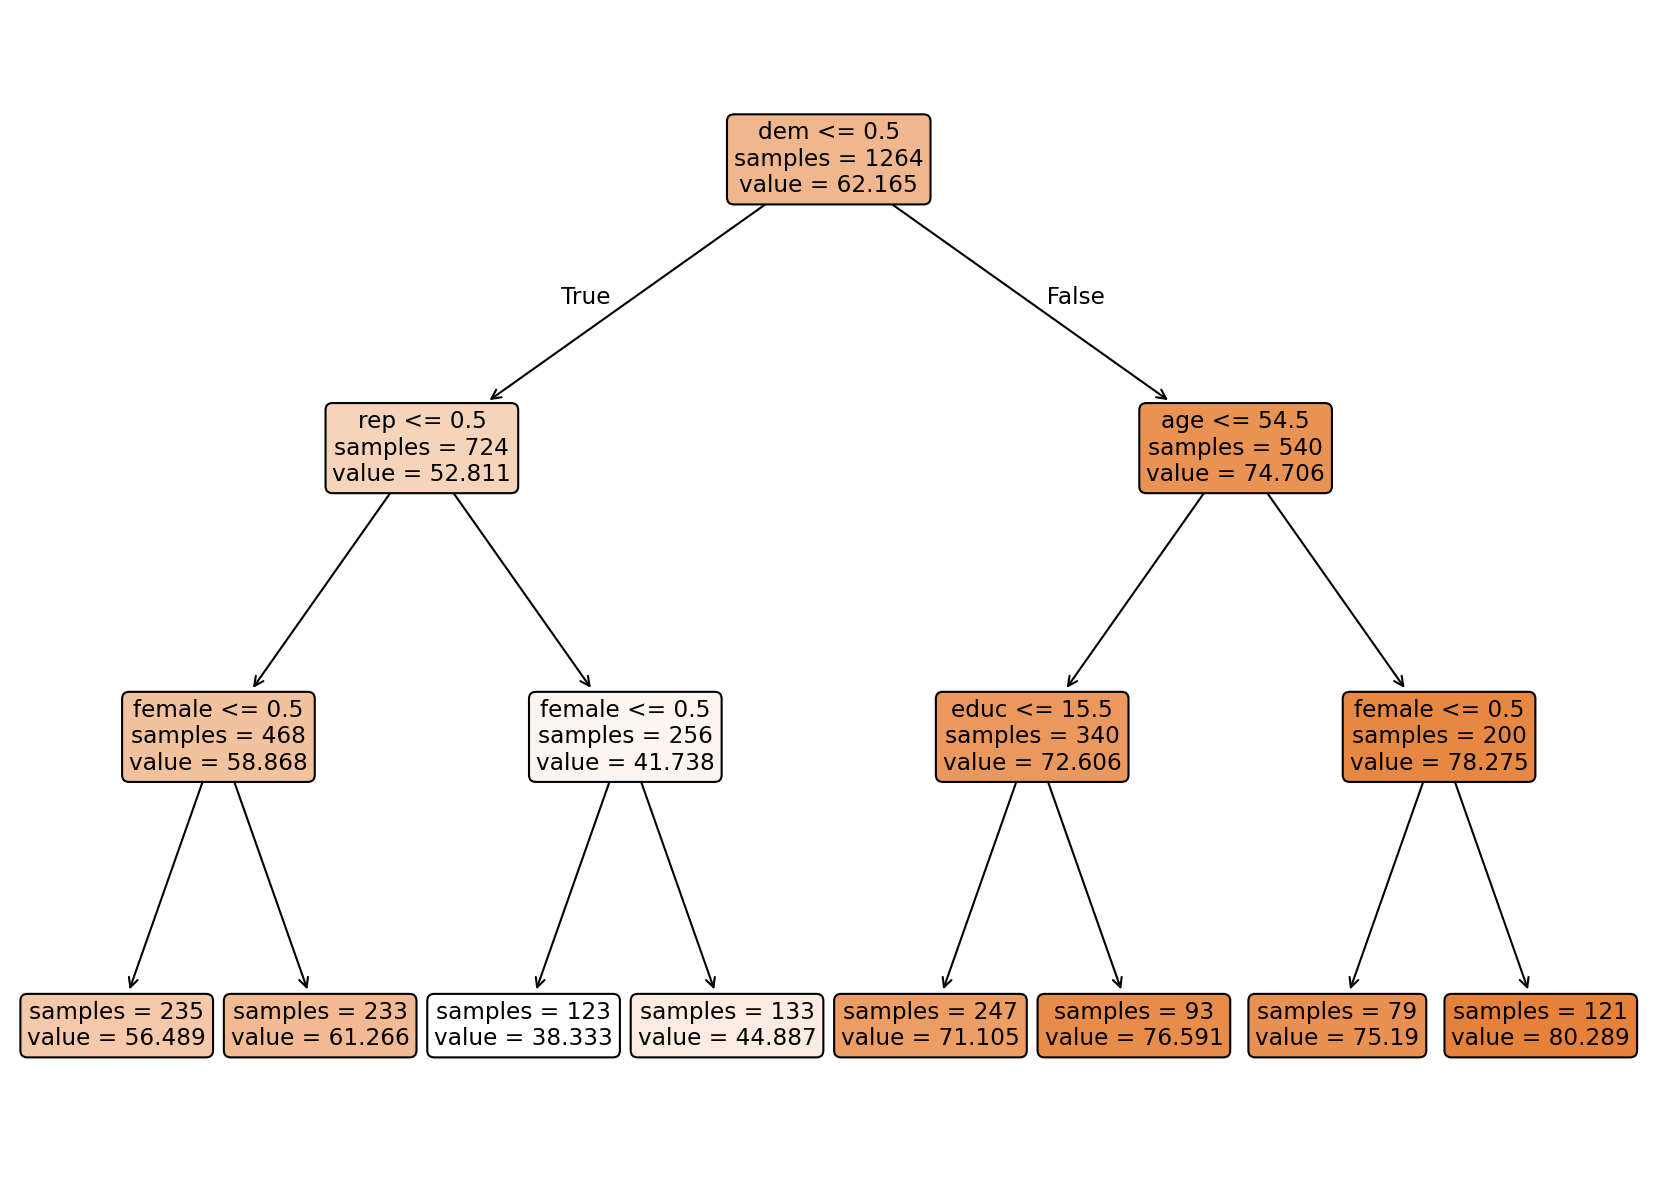

In [15]:
# Plotting the tree
feature_names = list(X.columns)

plt.figure(figsize=(14, 10), dpi=150)
plot_tree(
    tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    impurity=False
)
plt.show()


## Task 3

In [16]:
# Parameter distributions
param_dist = {
    "n_estimators": [10, 200],
    "max_depth": [3, 10],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20),
    "max_features": sp_randint(1, 5),
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rf_rs = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_STATE),
    param_distributions=param_dist,
    n_iter=100,
    n_jobs=-1,
    cv=cv5,
    random_state=RANDOM_STATE,
    scoring="neg_mean_squared_error",
    verbose=0,
)

rf_rs.fit(X, y)

best_params = rf_rs.best_params_
best_cv_mse = -rf_rs.best_score_  # converted from negative MSE to MSE

print("Task 3 — Best params:", best_params)
print(f"Task 3 — Best CV MSE: {best_cv_mse:.4f}")


Task 3 — Best params: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
Task 3 — Best CV MSE: 395.6785


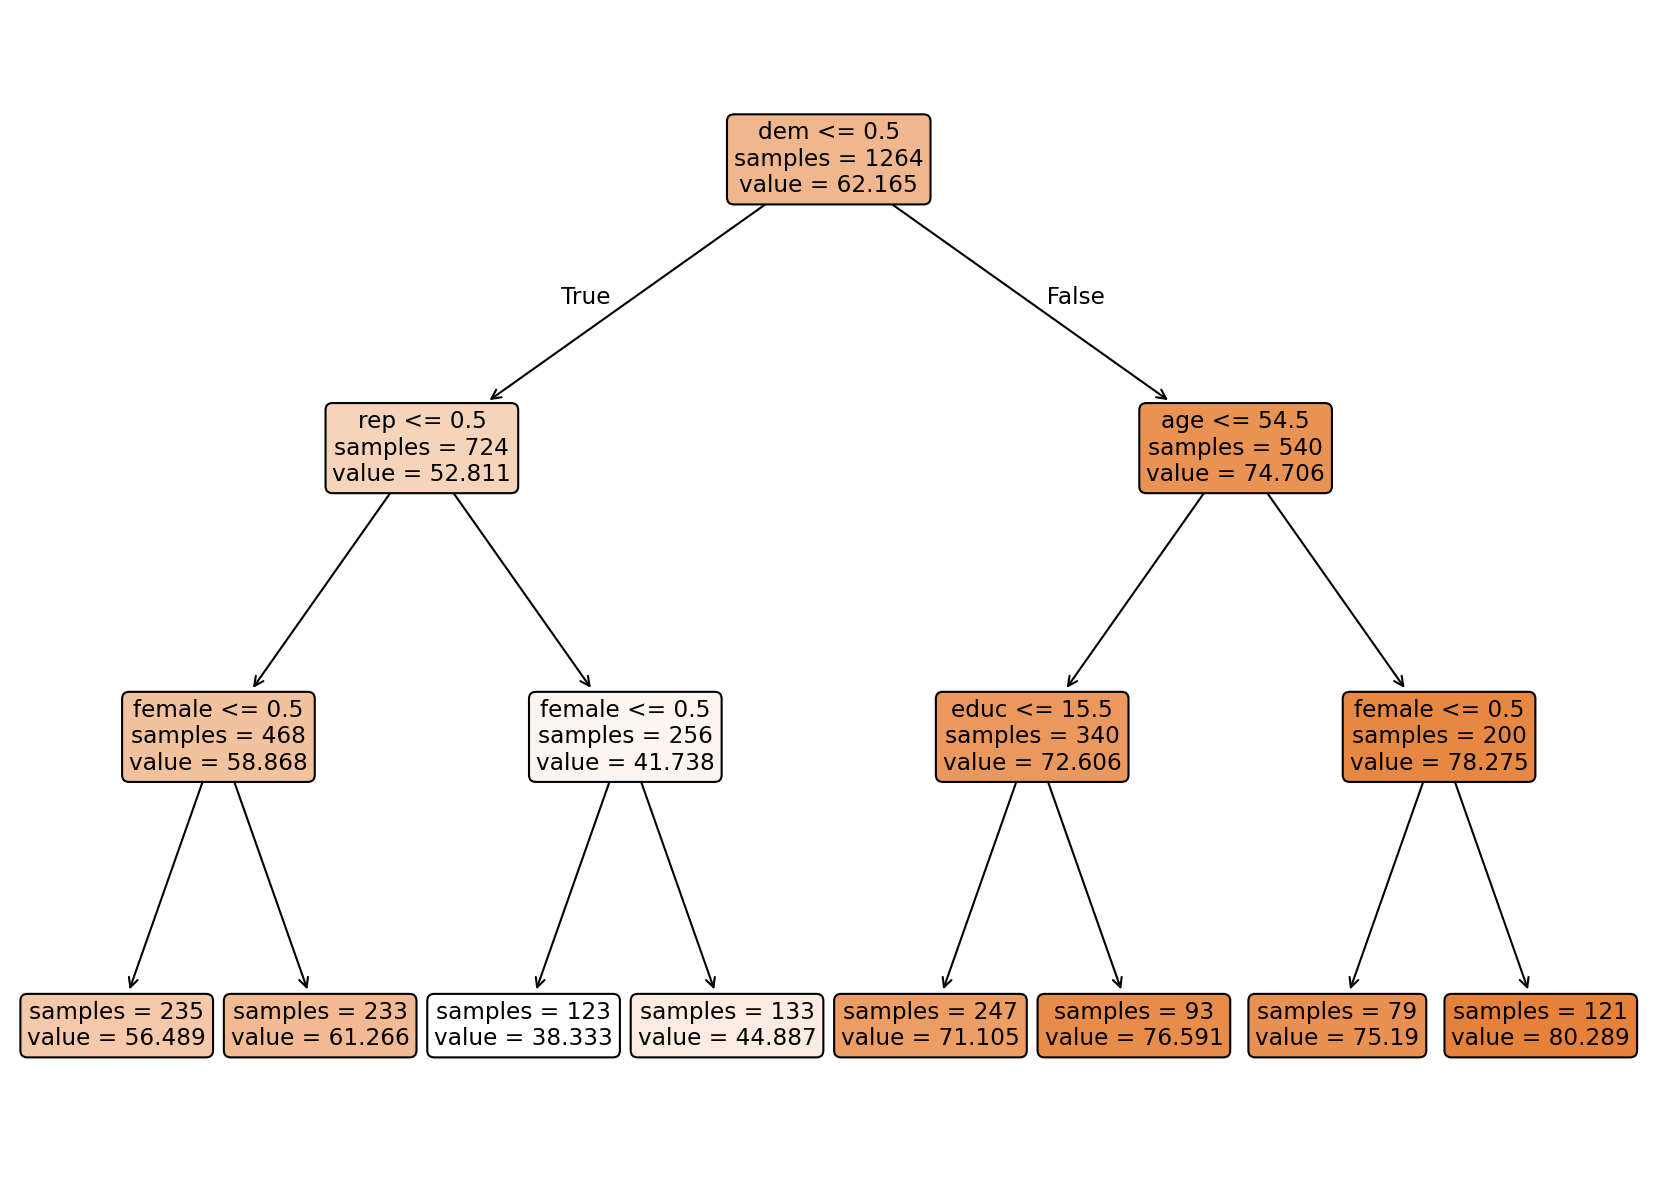

In [17]:
# Plotting the tree
feature_names = list(X.columns)

plt.figure(figsize=(14, 10), dpi=150)
plot_tree(
    tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    impurity=False
)
plt.show()


Plot the tree